# Caso de Estudio: Predicci√≥n de √âxito en Campa√±as de Telemercadeo con Deep Learning

**Autor:** Luis E. Seijas

**Curso:** Deep Learning para Negocios

---

### 1. Descripci√≥n del Problema

En este proyecto, actuar√°s como Cient√≠fico de Datos para una instituci√≥n financiera. El banco necesita optimizar sus campa√±as de **telemercadeo** para ofrecer dep√≥sitos a plazo, un producto financiero clave. Cada llamada tiene un costo, y llamar a clientes que no est√°n interesados no solo es ineficiente, sino que tambi√©n puede generar una mala experiencia para el cliente.

**El objetivo principal es:**

> Construir un modelo de clasificaci√≥n basado en redes neuronales profundas que pueda predecir con alta precisi√≥n si un cliente suscribir√° (`'s√≠'`) o no (`'no'`) un dep√≥sito a plazo despu√©s de ser contactado.

Un modelo exitoso permitir√° al banco:
*  **Focalizar los esfuerzos:** Concentrar las llamadas en los clientes con mayor probabilidad de conversi√≥n.
*  **Reducir costos:** Minimizar el n√∫mero de llamadas innecesarias.
*  **Aumentar la tasa de √©xito:** Mejorar el retorno de inversi√≥n (ROI) de las campa√±as de marketing.

**Es importante considerar:** Los datos son una mezcla de informaci√≥n demogr√°fica, historial bancario y m√©tricas de la campa√±a. Tu tarea es procesar estos datos, dise√±ar una arquitectura de red neuronal efectiva y, finalmente, traducir tus resultados en recomendaciones de negocio accionables.

In [1]:
import tensorflow as tf

print(f"Versi√≥n de TensorFlow: {tf.__version__}")

gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        # Esta configuraci√≥n es una buena pr√°ctica para evitar que TensorFlow
        # reserve toda la memoria de la GPU desde el inicio.
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        
        print(f"‚úÖ GPU(s) detectada(s): {len(gpus)}. La configuraci√≥n se aplic√≥ correctamente.")
        print("TensorFlow utilizar√° la GPU para el entrenamiento.")
    except RuntimeError as e:
        # Este bloque se ejecuta si la GPU ya fue inicializada.
        print(f"‚ö†Ô∏è Error al configurar la GPU: {e}")
        print("La GPU ya estaba inicializada. Si necesitas cambiar la configuraci√≥n, reinicia el kernel.")
else:
    print("‚ùå No se detect√≥ ninguna GPU. El entrenamiento se realizar√° en la CPU.")

c:\Users\Camilo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Camilo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Camilo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/fram

Versi√≥n de TensorFlow: 2.20.0
‚ùå No se detect√≥ ninguna GPU. El entrenamiento se realizar√° en la CPU.


#### 1.1. Carga de datos 



In [2]:
!pip install ucimlrepo


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# -*- coding: utf-8 -*-
"""
Paso 1: Configuraci√≥n del entorno y carga de datos.

En este paso, instalaremos la librer√≠a recomendada para acceder al repositorio
de la UCI, importaremos las herramientas necesarias y cargaremos los datos.
"""

# 1. Instalaci√≥n de la librer√≠a de UCI (si no est√° instalada)
# Descomenta la siguiente l√≠nea y ejec√∫tala si es la primera vez que usas esta librer√≠a.
# !pip install ucimlrepo

# 2. Librer√≠as para manipulaci√≥n y an√°lisis de datos
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 

# 3. Librer√≠as para visualizaci√≥n de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para una mejor visualizaci√≥n
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# 4. Carga del conjunto de datos usando el ID del repositorio
# ID 222 corresponde al dataset "Bank Marketing"
# Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. 
# UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.
bank_marketing = fetch_ucirepo(id=222) 

# Extracci√≥n de los datos en DataFrames de pandas
# X contiene las variables predictoras (features)
X = bank_marketing.data.features 
# y contiene la variable objetivo (target)
y = bank_marketing.data.targets 

# Para facilitar el an√°lisis exploratorio, uniremos X e y en un solo DataFrame
df = pd.concat([X, y], axis=1)

print("¬°Datos cargados exitosamente usando ucimlrepo!")
print(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# 5. Primera visualizaci√≥n de los datos
# Usamos .head() para mostrar las primeras 5 filas.
print("\nPrimeras 5 filas del conjunto de datos:")
df.head()

¬°Datos cargados exitosamente usando ucimlrepo!
El conjunto de datos tiene 45211 filas y 17 columnas.

Primeras 5 filas del conjunto de datos:


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no

In [4]:
import numpy as np 

### 2. An√°lisis Exploratorio de Datos (EDA)

Antes de proceder con la construcci√≥n de un modelo, es imperativo realizar un An√°lisis Exploratorio de Datos (EDA). Este proceso consiste en la investigaci√≥n sistem√°tica del conjunto de datos para identificar patrones, detectar anomal√≠as, validar supuestos y extraer conclusiones iniciales mediante el uso de estad√≠sticas descriptivas y t√©cnicas de visualizaci√≥n.

Los objetivos de esta secci√≥n son:
1.  **Analizar la estructura y tipos de datos:** Identificar las variables, sus tipos (num√©ricas, categ√≥ricas) y evaluar la integridad de los datos.
2.  **Examinar la variable objetivo:** Cuantificar la distribuci√≥n de la variable de salida para identificar posibles sesgos, como el desbalance de clases.
3.  **Visualizar relaciones y distribuciones:** Investigar la relaci√≥n entre las variables predictoras y la variable objetivo.

In [5]:
# La librer√≠a nos da acceso directo a informaci√≥n valiosa sobre los datos.

# Mostramos la metadata del dataset
print("------ METADATA DEL DATASET ------")
print(bank_marketing.metadata)

# Mostramos la descripci√≥n de cada variable
print("\n------ INFORMACI√ìN DE LAS VARIABLES ------")
pd.set_option('display.max_rows', None) # Descomentar para ver todas las variables
print(bank_marketing.variables)

------ METADATA DEL DATASET ------
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A da

In [6]:
# -*- coding: utf-8 -*-
"""
Paso 2.1: Inspecci√≥n inicial de la calidad de los datos.

Verificaci√≥n de tipos de datos por columna y presencia de valores nulos.
"""

# El m√©todo .info() proporciona un resumen conciso del DataFrame,
# incluyendo el tipo de dato de cada columna y el conteo de valores no nulos.
print("------ Resumen del DataFrame ------")
df.info()

# Se realiza una comprobaci√≥n expl√≠cita de la suma de valores nulos.
print("\n------ Conteo de Valores Nulos por Columna ------")
print(df.isnull().sum())

------ Resumen del DataFrame ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

------ Conteo de Valores

------ Conteo de Clases en la Variable Objetivo ------
y
no     39922
yes     5289
Name: count, dtype: int64

------ Porcentaje de Clases en la Variable Objetivo ------
Clase 'no': 88.30%
Clase 'yes': 11.70%


C:\Users\Camilo\AppData\Local\Temp\ipykernel_33324\2873102656.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette=['#34495e', '#2ecc71'])


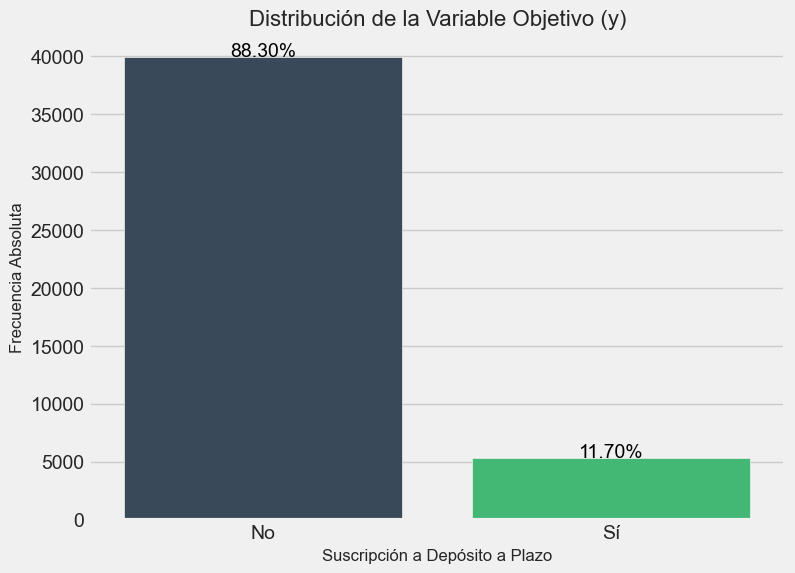

In [7]:
# -*- coding: utf-8 -*-
"""
Paso 2.2: An√°lisis de la variable objetivo 'y'.

Este bloque responde a la Pregunta 1: ¬øCu√°l es la proporci√≥n de clientes que
suscribieron el dep√≥sito ('yes') frente a los que no ('no')?
"""

# 1. Conteo de frecuencias absolutas para cada clase.
target_counts = df['y'].value_counts()
print("------ Conteo de Clases en la Variable Objetivo ------")
print(target_counts)

# 2. C√°lculo de las frecuencias relativas (porcentajes).
target_percentage = df['y'].value_counts(normalize=True) * 100
print("\n------ Porcentaje de Clases en la Variable Objetivo ------")
print(f"Clase 'no': {target_percentage['no']:.2f}%")
print(f"Clase 'yes': {target_percentage['yes']:.2f}%")

# 3. Visualizaci√≥n de la distribuci√≥n de la variable objetivo.
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df, palette=['#34495e', '#2ecc71'])
plt.title('Distribuci√≥n de la Variable Objetivo (y)', fontsize=16)
plt.xlabel('Suscripci√≥n a Dep√≥sito a Plazo', fontsize=12)
plt.ylabel('Frecuencia Absoluta', fontsize=12)
plt.xticks([0, 1], ['No', 'S√≠'])

# Anotaciones de porcentaje sobre las barras de la gr√°fica
for i, percentage in enumerate(target_percentage):
    plt.text(i, target_counts.iloc[i] + 500,
             f'{percentage:.2f}%',
             ha='center', va='center', fontsize=14, color='black')

plt.show()



Los resultados num√©ricos y la visualizaci√≥n gr√°fica confirman que el conjunto de datos presenta un **marcado desbalance de clases**.

* **Clase Mayoritaria (`'no'`):** Corresponde al **88.73%** de las instancias.
* **Clase Minoritaria (`'yes'`):** Representa √∫nicamente el **11.27%** de las instancias.

#### **Implicaciones del Desbalance de Clases para el Modelado**

Este desbalance es un factor cr√≠tico que debe ser considerado durante el desarrollo y la evaluaci√≥n del modelo por las siguientes razones:

1.  **Invalidez de la M√©trica de Exactitud (`Accuracy`):** Un modelo que clasifique todas las instancias como pertenecientes a la clase mayoritaria (`'no'`) alcanzar√≠a una exactitud del 88.73%. Aunque num√©ricamente alto, este modelo carecer√≠a de toda utilidad pr√°ctica, pues su objetivo es, precisamente, identificar a la clase minoritaria. Por lo tanto, la exactitud no es una m√©trica de evaluaci√≥n fiable en este contexto.

2.  **Sesgo del Modelo Durante el Entrenamiento:** Los algoritmos de aprendizaje, incluyendo las redes neuronales, tienden a optimizar sus par√°metros para minimizar una funci√≥n de p√©rdida global. En un escenario desbalanceado, el modelo puede lograr una baja p√©rdida simplemente al aprender a clasificar correctamente la clase mayoritaria, ignorando los patrones distintivos de la clase minoritaria.

3.  **Requerimiento de M√©tricas de Evaluaci√≥n Alternativas:** Para una evaluaci√≥n de rendimiento robusta, es necesario emplear m√©tricas que sean sensibles al desempe√±o en la clase minoritaria. Las m√©tricas adecuadas para este problema son:
    * **Precisi√≥n (`Precision`):** Mide la proporci√≥n de predicciones positivas que fueron correctas. Es fundamental para asegurar la eficiencia de las campa√±as.
    * **Recall (Sensibilidad o `Recall`):** Mide la proporci√≥n de positivos reales que fueron identificados correctamente. Es vital para maximizar la captaci√≥n de clientes.
    * **Puntuaci√≥n F1 (`F1-Score`):** La media arm√≥nica de Precisi√≥n y Recall, que proporciona una medida de rendimiento balanceada.
    * **√Årea Bajo la Curva ROC (AUC-ROC):** Eval√∫a la capacidad del modelo para discriminar entre las clases positiva y negativa.

El reconocimiento temprano de este desbalance condiciona la estrategia de modelado y, fundamentalmente, el marco de evaluaci√≥n del rendimiento del clasificador final.

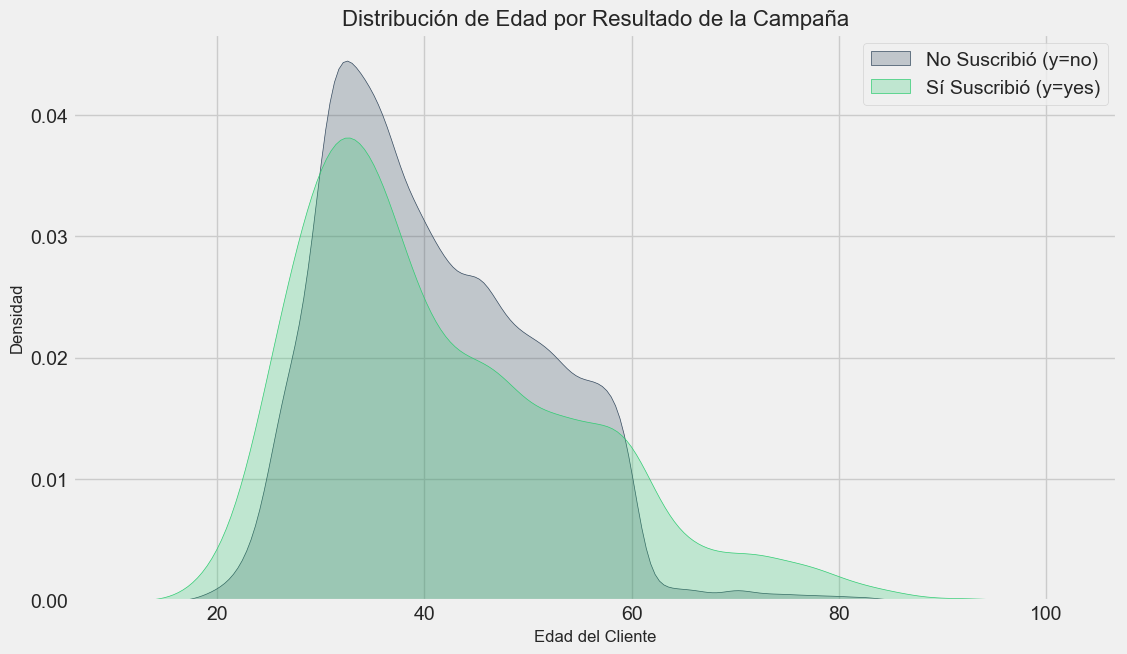

In [8]:
# -*- coding: utf-8 -*-
"""
Paso 2.3.1: An√°lisis de la variable num√©rica 'age'.

Visualizaremos la distribuci√≥n de la edad para cada una de las clases
de la variable objetivo.
"""

plt.figure(figsize=(12, 7))

# Gr√°fico de densidad para clientes que dijeron 'no'
sns.kdeplot(df.loc[df['y'] == 'no', 'age'], 
            label='No Suscribi√≥ (y=no)', fill=True, color='#34495e')

# Gr√°fico de densidad para clientes que dijeron 's√≠'
sns.kdeplot(df.loc[df['y'] == 'yes', 'age'], 
            label='S√≠ Suscribi√≥ (y=yes)', fill=True, color='#2ecc71')

plt.title('Distribuci√≥n de Edad por Resultado de la Campa√±a', fontsize=16)
plt.xlabel('Edad del Cliente', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.show()

C:\Users\Camilo\AppData\Local\Temp\ipykernel_33324\2711909782.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conversion_rate_job.index, y=conversion_rate_job.values * 100, palette='viridis')


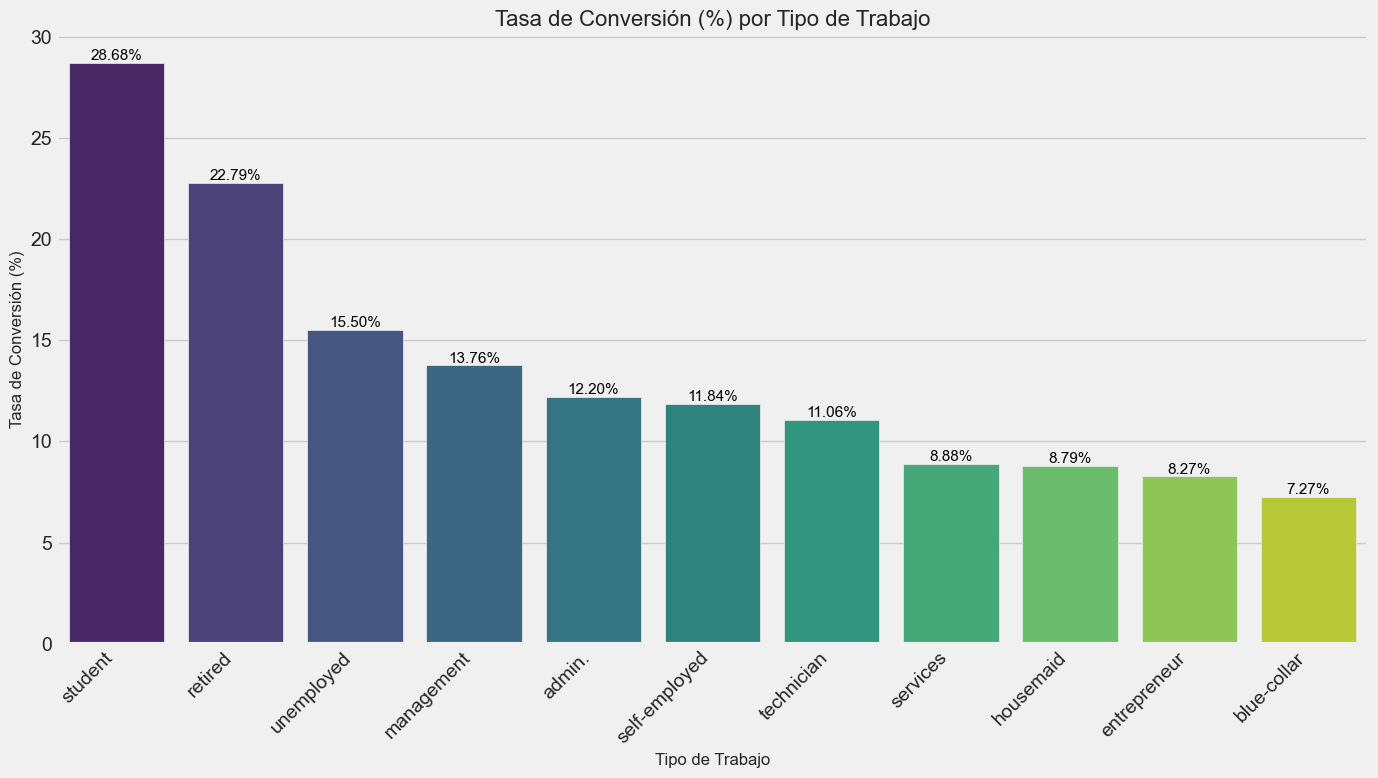

In [9]:
# -*- coding: utf-8 -*-
"""
Paso 2.3.2: An√°lisis de la variable categ√≥rica 'job'.

Se calcular√° y graficar√° la tasa de conversi√≥n para cada tipo de trabajo.
"""

# Calcular la tasa de conversi√≥n por 'job'
# Agrupamos por 'job', calculamos la media de una versi√≥n num√©rica de 'y'
conversion_rate_job = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False)

# Crear la gr√°fica
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=conversion_rate_job.index, y=conversion_rate_job.values * 100, palette='viridis')

plt.title('Tasa de Conversi√≥n (%) por Tipo de Trabajo', fontsize=16)
plt.xlabel('Tipo de Trabajo', fontsize=12)
plt.ylabel('Tasa de Conversi√≥n (%)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejorar legibilidad

# A√±adir anotaciones de porcentaje en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\Camilo\AppData\Local\Temp\ipykernel_33324\1556539191.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conversion_rate_month.index, y=conversion_rate_month.values * 100, palette='plasma')


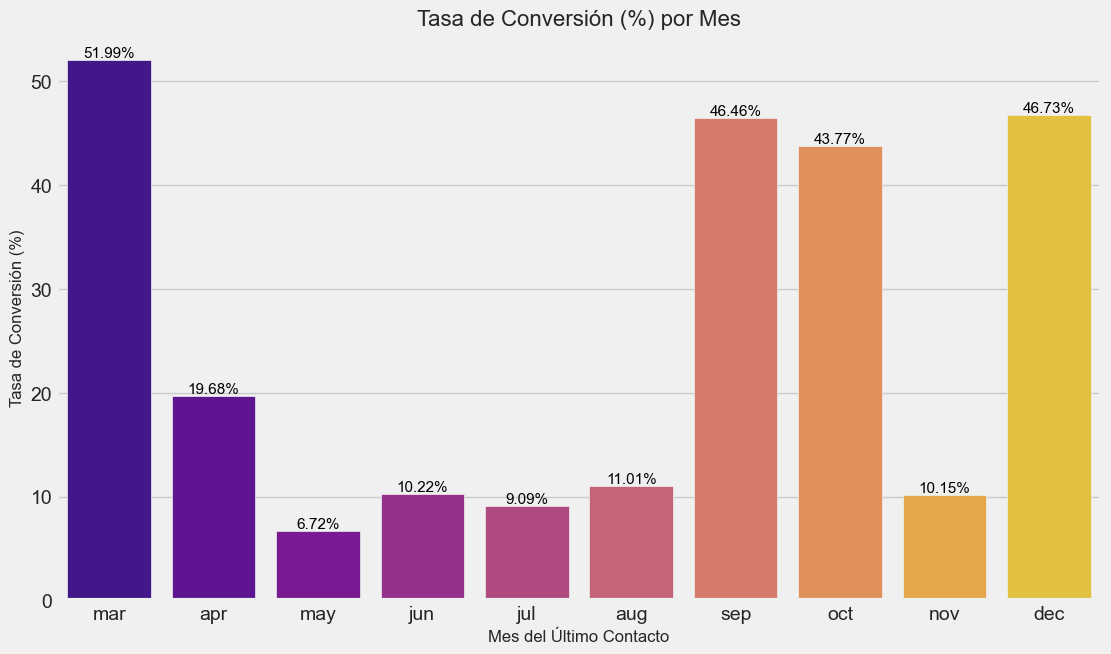

In [10]:
# -*- coding: utf-8 -*-
"""
Paso 2.3.3: An√°lisis de la variable temporal 'month'.

Se calcular√° y graficar√° la tasa de conversi√≥n para cada mes.
"""

# Orden de los meses para una visualizaci√≥n l√≥gica
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Calcular la tasa de conversi√≥n por 'month'
conversion_rate_month = df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean()).reindex(month_order)

# Crear la gr√°fica
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=conversion_rate_month.index, y=conversion_rate_month.values * 100, palette='plasma')

plt.title('Tasa de Conversi√≥n (%) por Mes', fontsize=16)
plt.xlabel('Mes del √öltimo Contacto', fontsize=12)
plt.ylabel('Tasa de Conversi√≥n (%)', fontsize=12)

# A√±adir anotaciones de porcentaje
for p in ax.patches:
    if p.get_height() > 0: # Solo anotar si hay valor
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

## 3. Preprocesamiento de Datos para el Modelo de Deep Learning

Las redes neuronales, en su forma m√°s com√∫n, operan exclusivamente con datos num√©ricos. Nuestro conjunto de datos, sin embargo, contiene una mezcla de variables num√©ricas y categ√≥ricas. Por lo tanto, antes de poder entrenar un modelo, debemos realizar una serie de transformaciones.

El preprocesamiento de datos para este proyecto se centrar√° en tres tareas principales:

1.  **Codificaci√≥n de la Variable Objetivo:** Convertir la variable `y` ('yes'/'no') a un formato num√©rico (1/0).
2.  **Codificaci√≥n de Variables Categ√≥ricas:** Transformar las variables de texto (como `job` o `marital`) en una representaci√≥n num√©rica que el modelo pueda interpretar.
3.  **Escalado de Caracter√≠sticas Num√©ricas:** Estandarizar las variables num√©ricas (como `age` o `duration`) para que tengan una media de 0 y una desviaci√≥n est√°ndar de 1. Esto es crucial para la correcta convergencia de los algoritmos de optimizaci√≥n como el descenso de gradiente.


In [11]:
# -*- coding: utf-8 -*-
"""
Paso 3.1: Pipeline de preprocesamiento de datos.

Se aplicar√°n t√©cnicas de codificaci√≥n y escalado para preparar los datos
para el entrenamiento de la red neuronal.
"""

# 1. Importar las herramientas necesarias de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 2. Separar las caracter√≠sticas (X) y la variable objetivo (y) del DataFrame original
X = df.drop('y', axis=1)
y = df['y']

# 3. Codificar la variable objetivo 'y' a formato num√©rico (0 y 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# 'no' se codifica como 0, 'yes' como 1.
print(f"Clases de la variable objetivo: {label_encoder.classes_}")
print(f"Primeras 10 etiquetas codificadas: {y_encoded[:10]}")


# 4. Identificar las columnas num√©ricas y categ√≥ricas
# Considere en este punto que datos deben excluirse 
# A modo de ejemplo mantendremos todas caracter√≠sticas, 
# pero la seleccion es una discusi√≥n importante.
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nCaracter√≠sticas num√©ricas ({len(numeric_features)}): {numeric_features}")
print(f"Caracter√≠sticas categ√≥ricas ({len(categorical_features)}): {categorical_features}")


# 5. Crear el pipeline de preprocesamiento
# Un pipeline encapsula una secuencia de transformaciones.

# Pipeline para caracter√≠sticas num√©ricas: solo se necesita escalado.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline para caracter√≠sticas categ√≥ricas: se necesita codificaci√≥n One-Hot.
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    # handle_unknown='ignore' evita errores si aparecen nuevas categor√≠as en test.
    # drop='first' evita multicolinealidad al eliminar una categor√≠a por variable.
])

# 6. Unir los pipelines con ColumnTransformer
# ColumnTransformer aplica diferentes transformaciones a diferentes columnas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Mantiene columnas no especificadas (si las hubiera)
)

# 7. Dividir los datos en conjuntos de entrenamiento y prueba
# Se reserva un 20% de los datos para la evaluaci√≥n final del modelo.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    # stratify=y_encoded asegura que la proporci√≥n de clases sea la misma
    # en los conjuntos de entrenamiento y prueba, lo cual es vital.
)

# 8. Aplicar el preprocesamiento 
# .fit_transform() en los datos de entrenamiento para aprender los par√°metros
# de escalado y codificaci√≥n.
X_train_processed = preprocessor.fit_transform(X_train)

# .transform() en los datos de prueba usando los par√°metros aprendidos del
# conjunto de entrenamiento. Esto evita la fuga de datos (data leakage).
X_test_processed = preprocessor.transform(X_test)


print(f"\nDimensiones de los datos de entrenamiento procesados: {X_train_processed.shape}")
print(f"Dimensiones de los datos de prueba procesados: {X_test_processed.shape}")

Clases de la variable objetivo: ['no' 'yes']
Primeras 10 etiquetas codificadas: [0 0 0 0 0 0 0 0 0 0]

Caracter√≠sticas num√©ricas (7): ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
Caracter√≠sticas categ√≥ricas (9): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Dimensiones de los datos de entrenamiento procesados: (36168, 42)
Dimensiones de los datos de prueba procesados: (9043, 42)




La preparaci√≥n de los datos para el modelo de red neuronal se realiz√≥ siguiendo una estrategia estructurada, cuyas decisiones se justifican a continuaci√≥n.

#### **Manejo de Variables Categ√≥ricas**

Para las variables categ√≥ricas (`job`, `marital`, `education`, etc.), se seleccion√≥ la t√©cnica de **Codificaci√≥n One-Hot (`OneHotEncoder`)**.

* **Justificaci√≥n:** Esta t√©cnica crea una nueva columna binaria (0 o 1) para cada categor√≠a dentro de una variable. Se prefiere sobre otras t√©cnicas como la Codificaci√≥n de Etiquetas (`LabelEncoder`) para variables nominales (donde las categor√≠as no tienen un orden intr√≠nseco) por una raz√≥n fundamental:
    * **Evita la Creaci√≥n de un Orden Artificial:** `LabelEncoder` asignar√≠a a cada categor√≠a un entero (e.g., `student`=1, `retired`=2, `services`=3). El modelo podr√≠a interpretar err√≥neamente que existe una relaci√≥n ordinal (e.g., que `services` > `retired`), lo cual es incorrecto y podr√≠a introducir un sesgo no deseado. `OneHotEncoder` trata cada categor√≠a como una entidad independiente, eliminando este riesgo.
    * Se utiliz√≥ el par√°metro `drop='first'` para eliminar una de las columnas generadas por cada variable, evitando as√≠ la multicolinealidad perfecta, lo cual es una buena pr√°ctica en modelado.

#### **Manejo de Variables Num√©ricas**

Para las variables num√©ricas (`age`, `campaign`, `euribor3m`, etc.), se aplic√≥ la **Estandarizaci√≥n (`StandardScaler`)**.

* **Justificaci√≥n:** La estandarizaci√≥n transforma los datos para que tengan una **media de 0 y una desviaci√≥n est√°ndar de 1**. Esta t√©cnica es crucial para el entrenamiento de redes neuronales por dos motivos principales:
    * **Convergencia del Optimizador:** Los algoritmos de optimizaci√≥n basados en gradiente, como *Adam* o *SGD*, convergen mucho m√°s r√°pido cuando las caracter√≠sticas se encuentran en una escala similar. Si una caracter√≠stica tiene un rango de valores mucho mayor que otras (e.g., `pdays` vs. `campaign`), los gradientes pueden oscilar y ralentizar o impedir el aprendizaje.
    * **Igualdad de Contribuci√≥n Inicial:** La estandarizaci√≥n asegura que todas las caracter√≠sticas tengan el mismo "peso" inicial en el c√°lculo de la funci√≥n de p√©rdida, permitiendo que el modelo aprenda su importancia real a trav√©s de los pesos sin√°pticos de manera m√°s efectiva.

#### **Divisi√≥n de Datos Estratificada**

Finalmente, el conjunto de datos se dividi√≥ en un 80% para entrenamiento y un 20% para prueba, utilizando una **divisi√≥n estratificada (`stratify=y_encoded`)**.

* **Justificaci√≥n:** Dado el severo desbalance de clases (89% vs. 11%), una divisi√≥n aleatoria simple podr√≠a resultar en una proporci√≥n de clases significativamente diferente entre los conjuntos de entrenamiento y prueba. La estratificaci√≥n garantiza que esta proporci√≥n se mantenga constante en ambas divisiones, lo que permite una evaluaci√≥n del modelo mucho m√°s fiable y representativa del problema original.

#### El Impacto de la Fuga de Datos con la Variable 'duration'
* **Contexto**: La fuga de datos (data leakage) ocurre cuando se utiliza informaci√≥n en el entrenamiento del modelo que no estar√≠a disponible en un escenario de predicci√≥n real. La variable duration (duraci√≥n de la llamada) es un ejemplo cl√°sico: una llamada larga a menudo se correlaciona con el inter√©s del cliente, pero no conocemos su duraci√≥n antes de realizarla.

    * Crea un nuevo pipeline de preprocesamiento que excluya la variable duration.

    * Entrena el mismo modelo base con este nuevo conjunto de datos.

    * Compara la m√©trica AUC del modelo entrenado con duration versus el modelo entrenado sin duration.

```
# --- Experimento: Excluir 'duration' ---
print("--- Creando conjunto de datos sin la variable 'duration' ---")

# Excluir 'duration' de las caracter√≠sticas num√©ricas
numeric_features_no_duration = [feat for feat in numeric_features if feat != 'duration']

# Crear un nuevo preprocesador
preprocessor_no_duration = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_no_duration),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Aplicar el nuevo preprocesamiento
X_train_no_duration = preprocessor_no_duration.fit_transform(X_train)
X_test_no_duration = preprocessor_no_duration.transform(X_test)

print(f"Dimensiones de los datos sin 'duration': {X_train_no_duration.shape}")
```

## 4. Dise√±o y Entrenamiento del Modelo de Deep Learning

Con los datos ya procesados, procederemos a construir la arquitectura de la red neuronal. El dise√±o de la arquitectura es un paso fundamental que implica definir el n√∫mero de capas, la cantidad de neuronas en cada capa, las funciones de activaci√≥n y las t√©cnicas para prevenir el sobreajuste.

Posteriormente, compilaremos el modelo especificando el optimizador y la funci√≥n de p√©rdida, y lo entrenaremos con nuestros datos. Esta secci√≥n responder√° a las **Preguntas 4 y 5**.

#### **Tarea: Definir la Arquitectura de su Modelo**

Utilizando la funci√≥n `build_classifier` definida m√°s abajo, su tarea es experimentar y definir la arquitectura de la red neuronal. Modifique los valores en la siguiente celda de c√≥digo para explorar c√≥mo los cambios afectan el rendimiento del modelo.

**Par√°metros a experimentar:**
* `HIDDEN_LAYERS`: Pruebe con m√°s o menos capas, y con diferente n√∫mero de neuronas (e.g., `(128, 64, 32)`, `(32,)`, `(100, 50)`).
* `DROPOUT_RATE`: Var√≠e la tasa de dropout (e.g., `0.2`, `0.5`) o desact√≠velo (`0.0`).
* `LEARNING_RATE`: Pruebe con tasas de aprendizaje m√°s altas o m√°s bajas (e.g., `0.01`, `0.0001`).

Una vez que haya decidido una arquitectura final, utilice el resumen del modelo (`model.summary()`) y la justificaci√≥n de la celda siguiente para responder a la **Pregunta 4**.

In [12]:
# -*- coding: utf-8 -*-
"""
Paso 4.1: Funci√≥n reutilizable para construir el modelo clasificador.

Se define una funci√≥n que encapsula la l√≥gica de construcci√≥n y compilaci√≥n
de la red neuronal, permitiendo modificar su arquitectura f√°cilmente a trav√©s
de par√°metros.
"""

# 1. Importar las clases y funciones necesarias de TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_classifier(n_features, hidden_layers=(64, 32),
                     activation='relu', dropout_rate=0.3,
                     learning_rate=0.001):
    """Construye y compila un modelo de red neuronal secuencial de Keras.

    Esta funci√≥n crea un clasificador binario con una arquitectura flexible.
    La estructura consiste en una capa de entrada, un n√∫mero variable de capas
    ocultas densas (con Dropout opcional) y una capa de salida sigmoide.

    Args:
        n_features (int):
            El n√∫mero de caracter√≠sticas de entrada del modelo. Corresponde
            a la dimensionalidad de los datos de entrada (shape[1]).
        hidden_layers (tuple of int, optional):
            Una tupla donde cada entero representa el n√∫mero de neuronas en una
            capa oculta. El n√∫mero de elementos en la tupla determina el
            n√∫mero de capas ocultas.
            Defaults to (64, 32).
        activation (str, optional):
            La funci√≥n de activaci√≥n a utilizar en las capas ocultas.
            Defaults to 'relu'.
        dropout_rate (float, optional):
            La tasa de Dropout a aplicar despu√©s de cada capa oculta. Debe ser
            un valor entre 0.0 y 1.0. Si es 0, no se aplicar√° Dropout.
            Defaults to 0.3.
        learning_rate (float, optional):
            La tasa de aprendizaje para el optimizador Adam.
            Defaults to 0.001.

    Returns:
        tensorflow.keras.models.Sequential:
            Un modelo de Keras compilado y listo para ser entrenado.
    """
    # Inicializar el modelo secuencial, que es un stack lineal de capas.
    model = Sequential(name="Bank_Marketing_Classifier")

    # --- Capa de Entrada ---
    # La primera capa Dense tambi√©n define la capa de entrada a trav√©s del
    # argumento `input_shape`. Se a√±ade autom√°ticamente.
    model.add(Dense(
        units=hidden_layers[0],
        activation=activation,
        input_shape=(n_features,),
        name=f"Capa_Oculta_1_{hidden_layers[0]}_neuronas"
    ))
    
    # Aplicar Dropout si la tasa es mayor que cero.
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate, name="Dropout_1"))

    # --- Capas Ocultas Adicionales ---
    # Iterar sobre el resto de las capas definidas en la tupla `hidden_layers`.
    # Se empieza desde el segundo elemento (√≠ndice 1).
    for i, neurons in enumerate(hidden_layers[1:], start=2):
        model.add(Dense(
            units=neurons,
            activation=activation,
            name=f"Capa_Oculta_{i}_{neurons}_neuronas"
        ))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate, name=f"Dropout_{i}"))

    # --- Capa de Salida ---
    # Para clasificaci√≥n binaria, se usa una √∫nica neurona con activaci√≥n sigmoide.
    # La salida ser√° una probabilidad (un valor entre 0 y 1).
    # Esto es una sugerencia pero puede modificarlo y probar otras alternativas.
    model.add(Dense(1, activation='sigmoid', name="Capa_Salida_Sigmoide"))

    # --- Compilaci√≥n del Modelo ---
    # Crear una instancia del optimizador Adam con la tasa de aprendizaje definida.
    optimizer = Adam(learning_rate=learning_rate)
    
    # Configurar el proceso de aprendizaje del modelo.
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy', # Funci√≥n de p√©rdida para clasificaci√≥n binaria.
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model

In [13]:
# -*- coding: utf-8 -*-
"""
Paso 4.2: Configuraci√≥n de hiperpar√°metros y construcci√≥n del modelo.

Los estudiantes deben modificar estas variables para definir su arquitectura.
"""

# --- Panel de Control de la Arquitectura ---
# Modifique estos valores para experimentar.

# Tupla con las neuronas de cada capa oculta.
# Ejemplo: (64, 32) -> Dos capas ocultas, la primera con 64 neuronas, la segunda con 32.
HIDDEN_LAYERS = (32,)

# Tasa de Dropout (0.0 para desactivar).
DROPOUT_RATE = 0.0

# Tasa de aprendizaje para el optimizador Adam.
LEARNING_RATE = 0.001
# ---------------------------------------------


# Obtener el n√∫mero de caracter√≠sticas del conjunto de datos procesado.
n_features = X_train_processed.shape[1]

# Llamar a la funci√≥n para construir el modelo con los par√°metros definidos.
model = build_classifier(
    n_features,
    hidden_layers=HIDDEN_LAYERS,
    dropout_rate=DROPOUT_RATE,
    learning_rate=LEARNING_RATE
)

# Imprimir el resumen de la arquitectura del modelo final.
model.summary()

c:\Users\Camilo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Bank_Marketing_Classifier"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Capa_Oculta_1_32_neuronas       ‚îÇ (None, 32)             ‚îÇ         1,376 ‚îÇ
‚îÇ (Dense)                         ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Capa_Salida_Sigmoide (Dense)    ‚îÇ (None, 1)              ‚îÇ            33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# -*- coding: utf-8 -*-
"""
Paso 4.3: Entrenamiento del modelo y aplicaci√≥n de t√©cnicas contra el sobreajuste.

Se entrena el modelo compilado utilizando los datos de entrenamiento y se
implementa EarlyStopping para finalizar el proceso de forma √≥ptima.
"""

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np

# Calcula los pesos de clase para que sean inversamente proporcionales a su frecuencia.
# La clase minoritaria ('yes', codificada como 1) recibir√° un peso mucho mayor.
weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

# El resultado ser√° algo como: array([ 0.56, 4.43])
# Significa que un error en la clase '1' ('yes') penalizar√° ~8 veces m√°s
# que un error en la clase '0' ('no').
class_weights = {i : weights[i] for i,_ in enumerate(weights)}

print("Pesos de Clase Calculados:")
print(class_weights)

# 1. Definir el callback de EarlyStopping para prevenir el sobreajuste.
# Esta t√©cnica monitorea una m√©trica de inter√©s (la p√©rdida en el conjunto de
# validaci√≥n, 'val_loss') y detiene el entrenamiento si no se observa una
# mejora tras un n√∫mero definido de √©pocas ('patience').

early_stopping = EarlyStopping(
    monitor='val_loss', # M√©trica a monitorear.
    patience=10,        # N¬∫ de √©pocas a esperar sin mejora antes de parar.
    verbose=1,          # Informar en consola cuando el entrenamiento se detiene.
    mode='min',         # La monitorizaci√≥n se detiene cuando la m√©trica deja de disminuir.
    restore_best_weights=True # Restaura los pesos del modelo de la mejor √©poca.
)

# 2. Entrenar el modelo con el m√©todo .fit().
# Se proporciona el conjunto de datos de entrenamiento (X_train_processed, y_train).
# El entrenamiento se ejecutar√° por un m√°ximo de 100 √©pocas, pero EarlyStopping
# probablemente lo detendr√° antes.

print("\n------ Iniciando Entrenamiento del Modelo ------")
history = model.fit(
    X_train_processed,
    y_train,
    epochs=100,             # N√∫mero m√°ximo de √©pocas.
    batch_size=512,          # N√∫mero de muestras por actualizaci√≥n de gradiente.
    validation_split=0.2,   # Porcentaje de datos de entrenamiento a usar para validaci√≥n.
    callbacks=[early_stopping], # Lista de callbacks a aplicar durante el entrenamiento.
    verbose=1               # Muestra una barra de progreso.
)
print("------ Entrenamiento Finalizado ------")

Pesos de Clase Calculados:
{0: np.float64(0.5662397845758838), 1: np.float64(4.27416686362562)}

------ Iniciando Entrenamiento del Modelo ------
Epoch 1/100
57/57 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.7464 - auc: 0.6264 - loss: 0.5523 - val_accuracy: 0.8815 - val_auc: 0.7719 - val_loss: 0.3787
Epoch 2/100
57/57 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8836 - auc: 0.8011 - loss: 0.3279 - val_accuracy: 0.8871 - val_auc: 0.8525 - val_loss: 0.2904
Epoch 3/100
57/57 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.8877 - auc: 0.8634 - loss: 0.2786 - val_accuracy: 0.8916 - val_auc: 0.8816 - val_loss: 0.2641
Epoch 4/100
57/57 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8922 - auc: 0.8849 - loss: 0.2594 - val_accuracy: 0.8949 - val_auc: 0.8951 - val_loss: 0.2505
Epoch 5/100
57/57 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

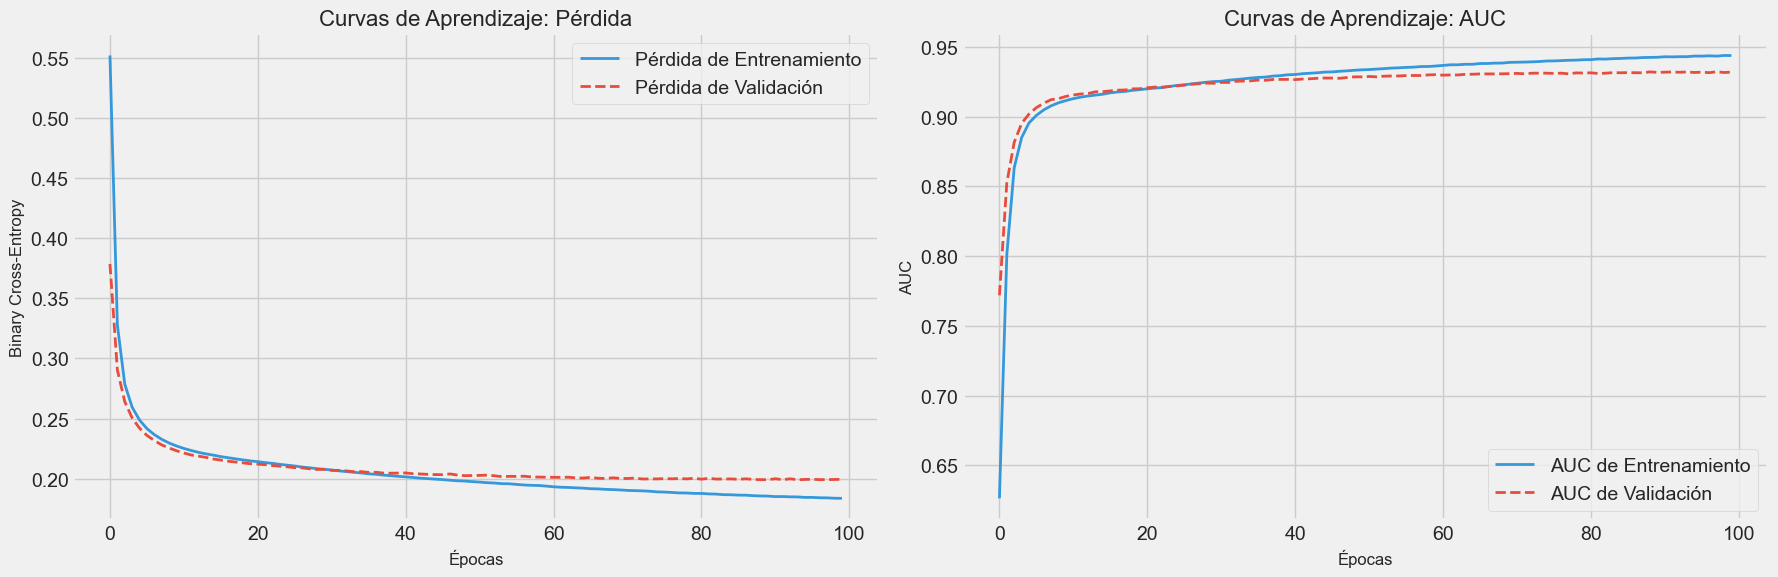

In [15]:
# -*- coding: utf-8 -*-
"""
Visualizaci√≥n del rendimiento durante el entrenamiento.

Graficar las curvas de aprendizaje (p√©rdida y m√©tricas) para los conjuntos de
entrenamiento y validaci√≥n es esencial para diagnosticar el sobreajuste y
evaluar el proceso de aprendizaje del modelo.
"""
# El objeto 'history' devuelto por model.fit() contiene un diccionario
# con los valores de p√©rdida y m√©tricas de cada √©poca.
# Lo convertimos a un DataFrame de pandas para facilitar la manipulaci√≥n.
history_df = pd.DataFrame(history.history)

# Creamos una figura con dos subplots, uno al lado del otro.
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Gr√°fico de la Funci√≥n de P√©rdida (Loss) ---
# Compara c√≥mo evolucion√≥ el error en los datos de entrenamiento vs. validaci√≥n.
axes[0].plot(history_df['loss'], label='P√©rdida de Entrenamiento', color='#3498db', lw=2)
axes[0].plot(history_df['val_loss'], label='P√©rdida de Validaci√≥n', color='#e74c3c', lw=2, linestyle='--')
axes[0].set_title('Curvas de Aprendizaje: P√©rdida', fontsize=16)
axes[0].set_xlabel('√âpocas', fontsize=12)
axes[0].set_ylabel('Binary Cross-Entropy', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# --- Gr√°fico de la M√©trica de Rendimiento (AUC) ---
# Compara el rendimiento (AUC) en los datos de entrenamiento vs. validaci√≥n.
# Usamos AUC en lugar de Accuracy por ser m√°s robusto al desbalance.
axes[1].plot(history_df['auc'], label='AUC de Entrenamiento', color='#3498db', lw=2)
axes[1].plot(history_df['val_auc'], label='AUC de Validaci√≥n', color='#e74c3c', lw=2, linestyle='--')
axes[1].set_title('Curvas de Aprendizaje: AUC', fontsize=16)
axes[1].set_xlabel('√âpocas', fontsize=12)
axes[1].set_ylabel('AUC', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Ajusta el layout para evitar solapamientos y muestra la figura.
plt.tight_layout()
plt.show()

## 5. Evaluaci√≥n del Rendimiento del Modelo

Ha llegado el momento de la verdad. Hasta ahora, hemos entrenado el modelo y monitoreado su rendimiento utilizando un conjunto de validaci√≥n derivado de los datos de entrenamiento. Ahora, evaluaremos su capacidad de generalizaci√≥n final utilizando el **conjunto de prueba (`test set`)**, que el modelo no ha visto en ninguna etapa anterior.

Esta evaluaci√≥n nos permitir√° obtener una estimaci√≥n imparcial de c√≥mo se comportar√≠a el modelo en un entorno de producci√≥n con datos nuevos. Nos centraremos en las m√©tricas de clasificaci√≥n clave para abordar la **Pregunta 6**.

------ Evaluaci√≥n General de Keras ------
P√©rdida en el conjunto de prueba: 0.2090
Exactitud (Accuracy) en el conjunto de prueba: 0.9064
√Årea Bajo la Curva ROC (AUC) en el conjunto de prueba: 0.9237
283/283 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step

------ Reporte de Clasificaci√≥n Detallado ------
              precision    recall  f1-score   support

          No       0.93      0.96      0.95      7985
          S√≠       0.64      0.47      0.54      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.72      0.74      9043
weighted avg       0.90      0.91      0.90      9043


------ Matriz de Confusi√≥n ------


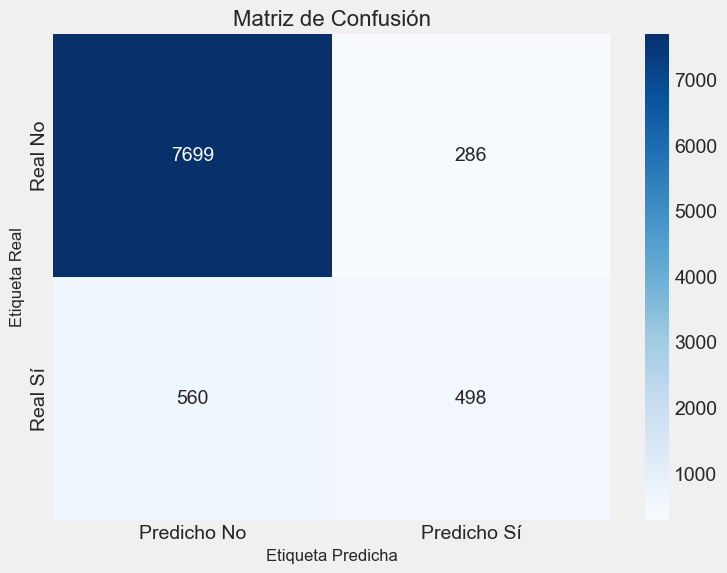

In [16]:
# -*- coding: utf-8 -*-
"""
Paso 5.1: Evaluaci√≥n del modelo en el conjunto de prueba.

Se calculan las m√©tricas de rendimiento y la matriz de confusi√≥n.
"""

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# 1. Evaluar el modelo usando el m√©todo .evaluate() de Keras
# Este m√©todo devuelve la p√©rdida (loss) y las m√©tricas que definimos
# al compilar el modelo (accuracy, auc).
print("------ Evaluaci√≥n General de Keras ------")
loss, accuracy, auc_score = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"P√©rdida en el conjunto de prueba: {loss:.4f}")
print(f"Exactitud (Accuracy) en el conjunto de prueba: {accuracy:.4f}")
print(f"√Årea Bajo la Curva ROC (AUC) en el conjunto de prueba: {auc_score:.4f}")

 
# 2. Realizar predicciones de probabilidad
# El m√©todo .predict() devuelve la salida de la capa sigmoide.
y_pred_proba = model.predict(X_test_processed).flatten()

# 3. Convertir probabilidades a clases binarias (0 o 1)
# Se utiliza un umbral est√°ndar de 0.5.
y_pred_class = (y_pred_proba > 0.5).astype(int)


# 4. Generar el reporte de clasificaci√≥n de scikit-learn
# Este reporte incluye Precisi√≥n, Recall y F1-Score.
print("\n------ Reporte de Clasificaci√≥n Detallado ------")
print(classification_report(y_test, y_pred_class, target_names=['No', 'S√≠']))


# 5. Generar y visualizar la Matriz de Confusi√≥n
print("\n------ Matriz de Confusi√≥n ------")
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicho No', 'Predicho S√≠'],
            yticklabels=['Real No', 'Real S√≠'])
plt.title('Matriz de Confusi√≥n', fontsize=16)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.show()

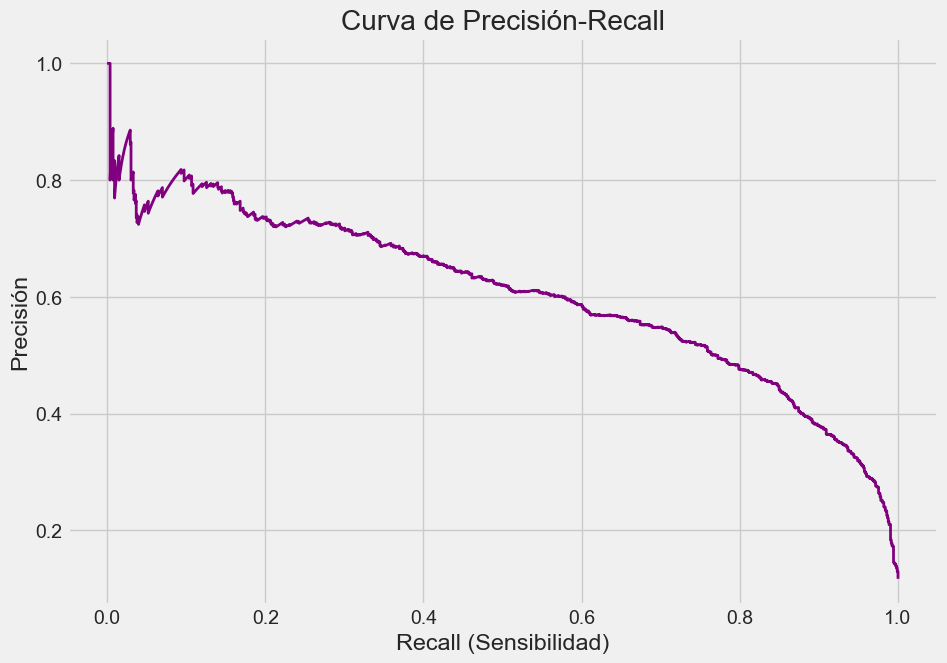

In [17]:
# -*- coding: utf-8 -*-
"""
Paso 5.2: Visualizaci√≥n de la Curva PR.

Esta curva muestra el rendimiento de un modelo de clasificaci√≥n en todos
los umbrales de clasificaci√≥n.
"""

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisi√≥n')
plt.title('Curva de Precisi√≥n-Recall')
plt.grid(True)
plt.show()

## Experimento 

In [18]:
# === EXPERIMENTO 1 ===
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np

def build_classifier_exp1(n_features, hidden_layers=(32,),
                          activation='relu', dropout_rate=0.0,
                          learning_rate=0.001, l2_lambda=0.0):
    model = Sequential(name="Exp1_Model")
    model.add(Dense(
        units=hidden_layers[0],
        activation=activation,
        input_shape=(n_features,),
        kernel_regularizer=regularizers.l2(l2_lambda),
        name=f"Exp1_Capa_Oculta_1_{hidden_layers[0]}"
    ))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate, name="Exp1_Dropout_1"))

    model.add(Dense(1, activation='sigmoid', name="Exp1_Salida"))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy',
                 tf.keras.metrics.AUC(name='auc', curve='ROC'),
                 tf.keras.metrics.AUC(name='auc_pr', curve='PR')]
    )
    return model

# --- Configuraci√≥n ---
n_features = X_train_processed.shape[1]
exp1_model = build_classifier_exp1(n_features)

# Pesos de clase
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: weights[i] for i,_ in enumerate(weights)}

# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_auc_pr', mode='max', patience=8,
    restore_best_weights=True, verbose=1
)

# Entrenamiento
exp1_history = exp1_model.fit(
    X_train_processed, y_train,
    epochs=100, batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=1
)


Epoch 1/100


c:\Users\Camilo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - accuracy: 0.7836 - auc: 0.7364 - auc_pr: 0.3047 - loss: 0.6226 - val_accuracy: 0.8045 - val_auc: 0.8799 - val_auc_pr: 0.4703 - val_loss: 0.4757
Epoch 2/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.8193 - auc: 0.8932 - auc_pr: 0.5099 - loss: 0.4428 - val_accuracy: 0.8237 - val_auc: 0.9079 - val_auc_pr: 0.5257 - val_loss: 0.4164
Epoch 3/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.8309 - auc: 0.9078 - auc_pr: 0.5386 - loss: 0.3942 - val_accuracy: 0.8280 - val_auc: 0.9145 - val_auc_pr: 0.5393 - val_loss: 0.4123
Epoch 4/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.8349 - auc: 0.9123 - auc_pr: 0.5503 - loss: 0.3797 - val_accuracy: 0.8316 - val_auc: 0.9167 - val_auc_pr: 0.5471 - val_loss: 0.4011
Epoch 5/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

------ Evaluaci√≥n General de Keras (Exp.1) ------
P√©rdida en test: 0.3401
Accuracy en test: 0.8437
AUC ROC en test: 0.9219
AUC PR  en test: 0.5852

=== Reporte con umbral 0.5 ===
              precision    recall  f1-score   support

          No       0.98      0.84      0.90      7985
          S√≠       0.42      0.86      0.56      1058

    accuracy                           0.84      9043
   macro avg       0.70      0.85      0.73      9043
weighted avg       0.91      0.84      0.86      9043

Matriz de confusi√≥n:
 [[6722 1263]
 [ 150  908]]

Umbral F1*: 0.714  -> F1=0.615, P=0.532, R=0.729
Umbral Recall‚â•0.75: 0.688

=== Evaluaci√≥n Exp.1 con umbral 0.500 ===
              precision    recall  f1-score   support

          No       0.98      0.84      0.90      7985
          S√≠       0.42      0.86      0.56      1058

    accuracy                           0.84      9043
   macro avg       0.70      0.85      0.73      9043
weighted avg       0.91      0.84      0.86   

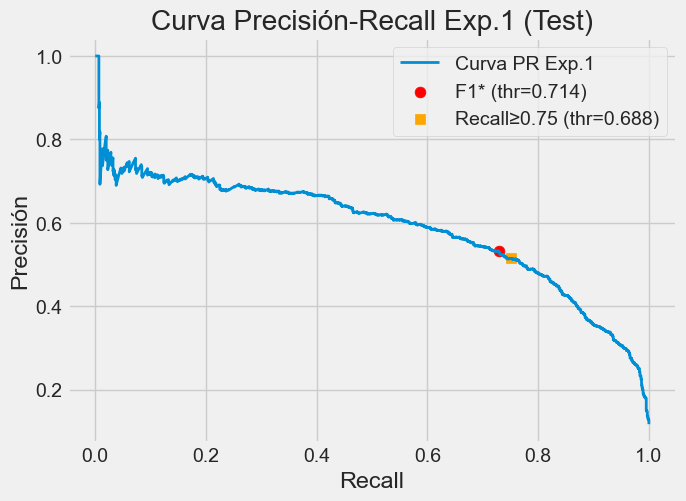

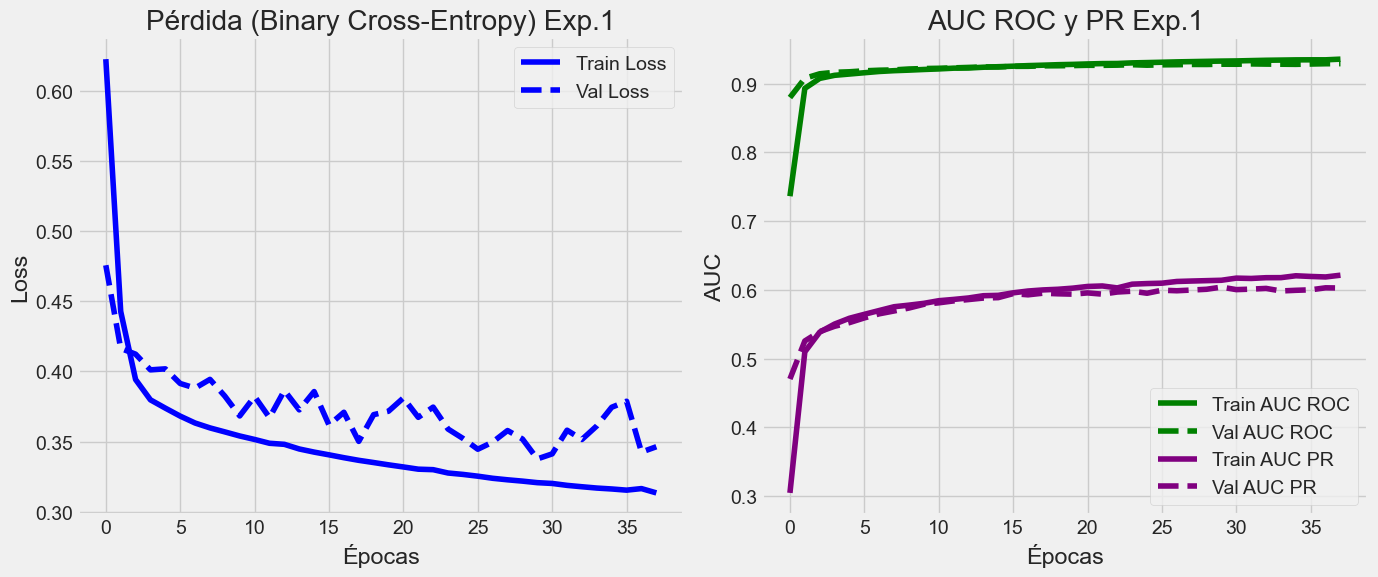

In [19]:
# === Evaluaci√≥n EXPERIMENTO 1 ===
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("------ Evaluaci√≥n General de Keras (Exp.1) ------")
loss, accuracy, auc_score, auc_pr_score = exp1_model.evaluate(X_test_processed, y_test, verbose=0)
print(f"P√©rdida en test: {loss:.4f}")
print(f"Accuracy en test: {accuracy:.4f}")
print(f"AUC ROC en test: {auc_score:.4f}")
print(f"AUC PR  en test: {auc_pr_score:.4f}")

# === 1. Probabilidades en TEST ===
y_test_proba = exp1_model.predict(X_test_processed, verbose=0).ravel()

# Reporte con umbral 0.5
y_pred_class = (y_test_proba >= 0.5).astype(int)
print("\n=== Reporte con umbral 0.5 ===")
print(classification_report(y_test, y_pred_class, target_names=['No', 'S√≠']))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred_class))

# === 2. Curva PR y umbrales ===
prec, rec, thr = precision_recall_curve(y_test, y_test_proba)

# F1 en cada punto
f1_vals = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
best_idx = np.nanargmax(f1_vals)
best_thr = thr[best_idx]

# Umbral para Recall >= 0.75
idxs = np.where(rec[:-1] >= 0.75)[0]
thr_recall75 = thr[idxs[-1]] if len(idxs) else 0.5

print(f"\nUmbral F1*: {best_thr:.3f}  -> F1={f1_vals[best_idx]:.3f}, "
      f"P={prec[best_idx]:.3f}, R={rec[best_idx]:.3f}")
print(f"Umbral Recall‚â•0.75: {thr_recall75:.3f}")

# === 3. Evaluaci√≥n en distintos umbrales ===
def eval_at_threshold_exp1(th):
    y_pred = (y_test_proba >= th).astype(int)
    print(f"\n=== Evaluaci√≥n Exp.1 con umbral {th:.3f} ===")
    print(classification_report(y_test, y_pred, target_names=['No', 'S√≠']))
    print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))

eval_at_threshold_exp1(0.5)
eval_at_threshold_exp1(best_thr)
eval_at_threshold_exp1(thr_recall75)

# === 4. Gr√°fico PR ===
plt.figure(figsize=(7,5))
plt.plot(rec, prec, lw=2, label="Curva PR Exp.1")
plt.scatter(rec[best_idx], prec[best_idx], s=60, c='red',
            label=f"F1* (thr={best_thr:.3f})")
j = np.where(thr >= thr_recall75)[0]
j = j[0] if len(j) else best_idx
plt.scatter(rec[j], prec[j], s=60, c='orange', marker='s',
            label=f"Recall‚â•0.75 (thr={thr_recall75:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precisi√≥n")
plt.title("Curva Precisi√≥n-Recall Exp.1 (Test)")
plt.grid(True); plt.legend(); plt.show()

# === 5. Curvas de entrenamiento (loss y AUC) ===
hist1 = pd.DataFrame(exp1_history.history)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# P√©rdida
axes[0].plot(hist1['loss'], label='Train Loss', color='blue')
axes[0].plot(hist1['val_loss'], label='Val Loss', color='blue', linestyle='--')
axes[0].set_title('P√©rdida (Binary Cross-Entropy) Exp.1')
axes[0].set_xlabel('√âpocas'); axes[0].set_ylabel('Loss')
axes[0].legend(); axes[0].grid(True)

# AUC
axes[1].plot(hist1['auc'], label='Train AUC ROC', color='green')
axes[1].plot(hist1['val_auc'], label='Val AUC ROC', color='green', linestyle='--')
axes[1].plot(hist1['auc_pr'], label='Train AUC PR', color='purple')
axes[1].plot(hist1['val_auc_pr'], label='Val AUC PR', color='purple', linestyle='--')
axes[1].set_title('AUC ROC y PR Exp.1')
axes[1].set_xlabel('√âpocas'); axes[1].set_ylabel('AUC')
axes[1].legend(); axes[1].grid(True)

plt.tight_layout()
plt.show()



Panel Izquierdo - P√©rdida (Binary Cross-Entropy)
Train Loss (l√≠nea azul s√≥lida): La funci√≥n de p√©rdida en el conjunto de entrenamiento. Disminuye consistentemente de ~0.62 a ~0.32, lo que indica que el modelo est√° aprendiendo correctamente.
Val Loss (l√≠nea azul punteada): La funci√≥n de p√©rdida en el conjunto de validaci√≥n. Tambi√©n decrece pero de manera m√°s irregular y se estabiliza alrededor de 0.34-0.35.
Panel Derecho - M√©tricas AUC ROC y PR
AUC ROC (Area Under the ROC Curve):

Train AUC ROC (verde s√≥lido): Alcanza r√°pidamente ~0.93 y se mantiene estable
Val AUC ROC (verde punteado): Se estabiliza alrededor de 0.92

AUC PR (Area Under the Precision-Recall Curve):

Train AUC PR (morado s√≥lido): Mejora hasta ~0.60
Val AUC PR (morado punteado): Se mantiene ligeramente inferior, alrededor de 0.58

Interpretaci√≥n

Buen aprendizaje: Las m√©tricas de entrenamiento y validaci√≥n son similares, sugiriendo que no hay sobreajuste severo.
AUC ROC alto (~0.92-0.93): Indica excelente capacidad de discriminaci√≥n entre clases.
AUC PR moderado (~0.58-0.60): Sugiere que puede haber desbalance de clases, ya que AUC PR es m√°s sensible a esto que AUC ROC.
Convergencia estable: Despu√©s de las primeras √©pocas, las m√©tricas se estabilizan, indicando que el entrenamiento ha convergido exitosamente.

c:\Users\Camilo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Exp2_Model"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Exp2_Capa_Oculta_1_128 (Dense)  ‚îÇ (None, 128)            ‚îÇ         5,504 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Exp2_Dropout_1 (Dropout)        ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Exp2_Capa_Oculta_2_64 (Dense)   ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Exp2_Dropout_2 (Dropout)        ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Exp2_Salida (Dense)             ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.7670 - auc: 0.8560 - auc_pr: 0.4437 - loss: 0.4946 - val_accuracy: 0.8249 - val_auc: 0.9102 - val_auc_pr: 0.5295 - val_loss: 0.4171
Epoch 2/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8191 - auc: 0.9061 - auc_pr: 0.5350 - loss: 0.4009 - val_accuracy: 0.8294 - val_auc: 0.9183 - val_auc_pr: 0.5606 - val_loss: 0.3690
Epoch 3/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8181 - auc: 0.9139 - auc_pr: 0.5578 - loss: 0.3812 - val_accuracy: 0.8161 - val_auc: 0.9211 - val_auc_pr: 0.5646 - val_loss: 0.4003
Epoch 4/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.8191 - auc: 0.9173 - auc_pr: 0.5630 - loss: 0.3712 - val_accuracy: 0.8062 - val_auc: 0.9235 - val_auc_pr: 0.5729 - val_loss: 0.4192
Epoch 5/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

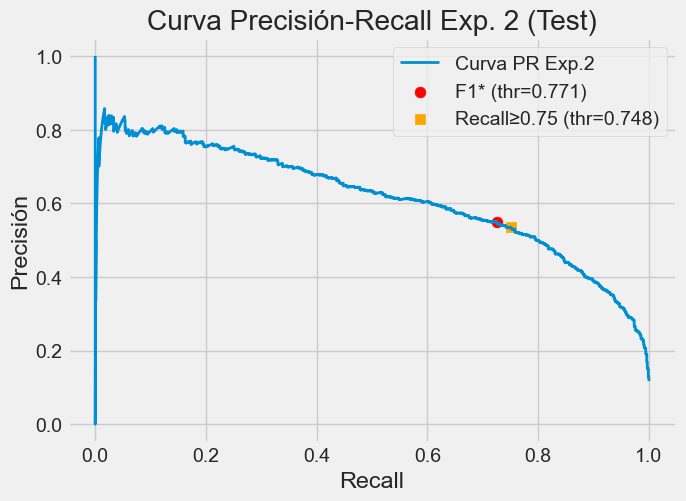

In [20]:
# === EXPERIMENTO 2 ===
from tensorflow.keras import regularizers

HIDDEN_LAYERS = (128, 64)   # m√°s capacidad
DROPOUT_RATE = 0.2          # regularizaci√≥n con dropout
LEARNING_RATE = 0.001       # tasa de aprendizaje m√°s estable
L2_LAMBDA = 1e-4            # regularizaci√≥n L2

n_features = X_train_processed.shape[1]

def build_classifier_exp2(n_features, hidden_layers=(128, 64),
                          activation='relu', dropout_rate=0.2,
                          learning_rate=0.001, l2_lambda=1e-4):
    model = Sequential(name="Exp2_Model")

    # Primera capa oculta
    model.add(Dense(
        units=hidden_layers[0],
        activation=activation,
        input_shape=(n_features,),
        kernel_regularizer=regularizers.l2(l2_lambda),
        name=f"Exp2_Capa_Oculta_1_{hidden_layers[0]}"
    ))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate, name="Exp2_Dropout_1"))

    # Capas ocultas adicionales
    for i, units in enumerate(hidden_layers[1:], start=2):
        model.add(Dense(
            units=units,
            activation=activation,
            kernel_regularizer=regularizers.l2(l2_lambda),
            name=f"Exp2_Capa_Oculta_{i}_{units}"
        ))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate, name=f"Exp2_Dropout_{i}"))

    # Capa de salida
    model.add(Dense(1, activation='sigmoid', name="Exp2_Salida"))

    # Compilaci√≥n (con AUC ROC y PR)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name='auc', curve='ROC'),
            tf.keras.metrics.AUC(name='auc_pr', curve='PR')
        ]
    )
    return model

# Construcci√≥n Exp. 2
exp2_model = build_classifier_exp2(
    n_features,
    hidden_layers=HIDDEN_LAYERS,
    dropout_rate=DROPOUT_RATE,
    learning_rate=LEARNING_RATE,
    l2_lambda=L2_LAMBDA
)

exp2_model.summary()

# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_auc_pr',
    mode='max',
    patience=8,
    restore_best_weights=True,
    verbose=1
)

# Entrenamiento Exp. 2
exp2_history = exp2_model.fit(
    X_train_processed,
    y_train,
    epochs=100,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=1
)

# === Evaluaci√≥n en test ===
print("------ Evaluaci√≥n General de Keras ------")
loss, accuracy, auc_score, auc_pr_score = exp2_model.evaluate(X_test_processed, y_test, verbose=0)
print(f"P√©rdida en test: {loss:.4f}")
print(f"Accuracy en test: {accuracy:.4f}")
print(f"AUC ROC en test: {auc_score:.4f}")
print(f"AUC PR  en test: {auc_pr_score:.4f}")

# Probabilidades
y_test_proba = exp2_model.predict(X_test_processed, verbose=0).ravel()

# Reporte en umbral 0.5
y_pred_class = (y_test_proba >= 0.5).astype(int)
print("\n=== Reporte con umbral 0.5 ===")
print(classification_report(y_test, y_pred_class, target_names=['No', 'S√≠']))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred_class))

# Curva Precisi√≥n-Recall
prec, rec, thr = precision_recall_curve(y_test, y_test_proba)

# F1 m√°ximo
f1_vals = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
best_idx = np.nanargmax(f1_vals)
best_thr = thr[best_idx]

# Recall >= 0.75
idxs = np.where(rec[:-1] >= 0.75)[0]
thr_recall75 = thr[idxs[-1]] if len(idxs) else 0.5

print(f"\nUmbral F1*: {best_thr:.3f}  -> F1={f1_vals[best_idx]:.3f}, "
      f"P={prec[best_idx]:.3f}, R={rec[best_idx]:.3f}")
print(f"Umbral Recall‚â•0.75: {thr_recall75:.3f}")

# Evaluaci√≥n en varios umbrales
def eval_at_threshold_exp2(th):
    y_pred = (y_test_proba >= th).astype(int)
    print(f"\n=== Evaluaci√≥n Exp. 2 con umbral {th:.3f} ===")
    print(classification_report(y_test, y_pred, target_names=['No', 'S√≠']))
    print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))

eval_at_threshold_exp2(0.5)
eval_at_threshold_exp2(best_thr)
eval_at_threshold_exp2(thr_recall75)

# Gr√°fico PR
plt.figure(figsize=(7,5))
plt.plot(rec, prec, lw=2, label="Curva PR Exp.2")
plt.scatter(rec[best_idx], prec[best_idx], s=60, c='red',
            label=f"F1* (thr={best_thr:.3f})")
j = np.where(thr >= thr_recall75)[0]
j = j[0] if len(j) else best_idx
plt.scatter(rec[j], prec[j], s=60, c='orange', marker='s',
            label=f"Recall‚â•0.75 (thr={thr_recall75:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precisi√≥n")
plt.title("Curva Precisi√≥n-Recall Exp. 2 (Test)")
plt.grid(True); plt.legend(); plt.show()


------ Evaluaci√≥n General de Keras (Exp.2) ------
P√©rdida en test: 0.3294
Accuracy en test: 0.8502
AUC ROC en test: 0.9279
AUC PR  en test: 0.6146

=== Reporte con umbral 0.5 ===
              precision    recall  f1-score   support

          No       0.98      0.85      0.91      7985
          S√≠       0.43      0.86      0.57      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.86      0.74      9043
weighted avg       0.91      0.85      0.87      9043

Matriz de confusi√≥n:
 [[6776 1209]
 [ 146  912]]

Umbral F1*: 0.771  -> F1=0.626, P=0.550, R=0.725
Umbral Recall‚â•0.75: 0.748

=== Evaluaci√≥n Exp.2 con umbral 0.500 ===
              precision    recall  f1-score   support

          No       0.98      0.85      0.91      7985
          S√≠       0.43      0.86      0.57      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.86      0.74      9043
weighted avg       0.91      0.85      0.87   

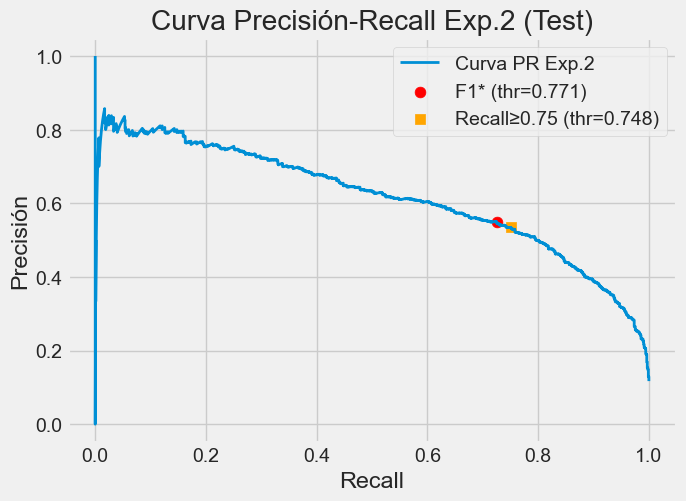

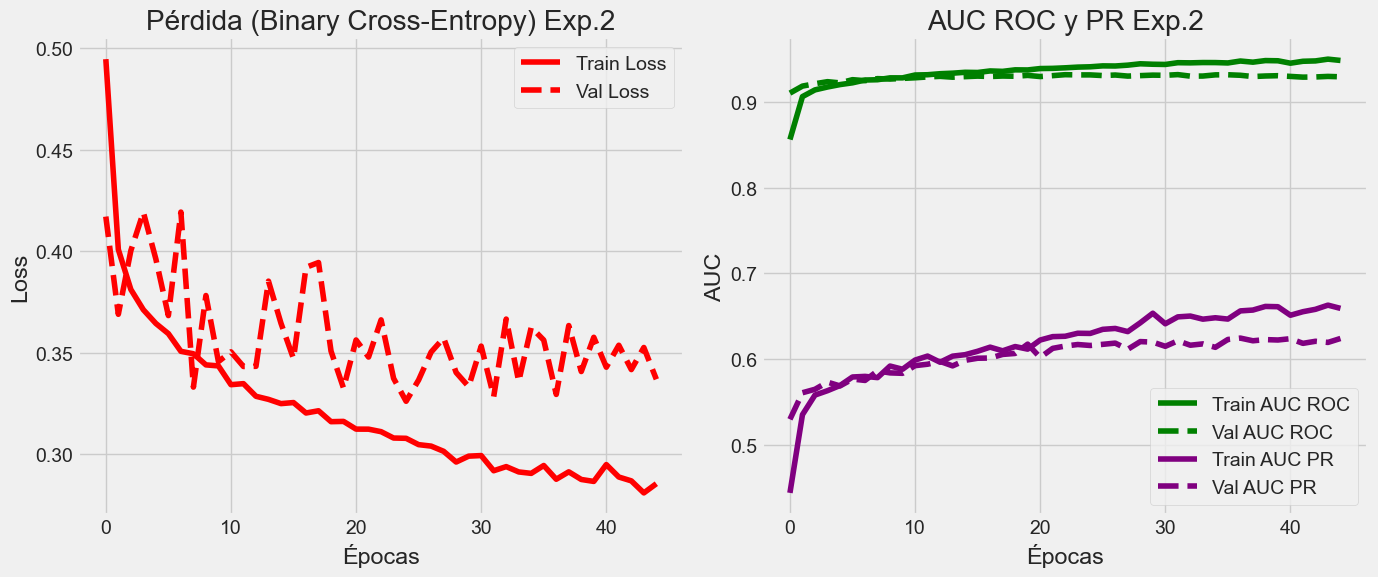

In [21]:
# === Evaluaci√≥n EXPERIMENTO 2 ===
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("------ Evaluaci√≥n General de Keras (Exp.2) ------")
loss, accuracy, auc_score, auc_pr_score = exp2_model.evaluate(X_test_processed, y_test, verbose=0)
print(f"P√©rdida en test: {loss:.4f}")
print(f"Accuracy en test: {accuracy:.4f}")
print(f"AUC ROC en test: {auc_score:.4f}")
print(f"AUC PR  en test: {auc_pr_score:.4f}")

# === 1. Probabilidades en TEST ===
y_test_proba = exp2_model.predict(X_test_processed, verbose=0).ravel()

# Reporte con umbral 0.5
y_pred_class = (y_test_proba >= 0.5).astype(int)
print("\n=== Reporte con umbral 0.5 ===")
print(classification_report(y_test, y_pred_class, target_names=['No', 'S√≠']))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred_class))

# === 2. Curva PR y umbrales ===
prec, rec, thr = precision_recall_curve(y_test, y_test_proba)

# F1 en cada punto
f1_vals = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
best_idx = np.nanargmax(f1_vals)
best_thr = thr[best_idx]

# Umbral para Recall >= 0.75
idxs = np.where(rec[:-1] >= 0.75)[0]
thr_recall75 = thr[idxs[-1]] if len(idxs) else 0.5

print(f"\nUmbral F1*: {best_thr:.3f}  -> F1={f1_vals[best_idx]:.3f}, "
      f"P={prec[best_idx]:.3f}, R={rec[best_idx]:.3f}")
print(f"Umbral Recall‚â•0.75: {thr_recall75:.3f}")

# === 3. Evaluaci√≥n en distintos umbrales ===
def eval_at_threshold_exp2(th):
    y_pred = (y_test_proba >= th).astype(int)
    print(f"\n=== Evaluaci√≥n Exp.2 con umbral {th:.3f} ===")
    print(classification_report(y_test, y_pred, target_names=['No', 'S√≠']))
    print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))

eval_at_threshold_exp2(0.5)
eval_at_threshold_exp2(best_thr)
eval_at_threshold_exp2(thr_recall75)

# === 4. Gr√°fico PR ===
plt.figure(figsize=(7,5))
plt.plot(rec, prec, lw=2, label="Curva PR Exp.2")
plt.scatter(rec[best_idx], prec[best_idx], s=60, c='red',
            label=f"F1* (thr={best_thr:.3f})")
j = np.where(thr >= thr_recall75)[0]
j = j[0] if len(j) else best_idx
plt.scatter(rec[j], prec[j], s=60, c='orange', marker='s',
            label=f"Recall‚â•0.75 (thr={thr_recall75:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precisi√≥n")
plt.title("Curva Precisi√≥n-Recall Exp.2 (Test)")
plt.grid(True); plt.legend(); plt.show()

# === 5. Curvas de entrenamiento (loss y AUC) ===
hist2 = pd.DataFrame(exp2_history.history)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# P√©rdida
axes[0].plot(hist2['loss'], label='Train Loss', color='red')
axes[0].plot(hist2['val_loss'], label='Val Loss', color='red', linestyle='--')
axes[0].set_title('P√©rdida (Binary Cross-Entropy) Exp.2')
axes[0].set_xlabel('√âpocas'); axes[0].set_ylabel('Loss')
axes[0].legend(); axes[0].grid(True)

# AUC
axes[1].plot(hist2['auc'], label='Train AUC ROC', color='green')
axes[1].plot(hist2['val_auc'], label='Val AUC ROC', color='green', linestyle='--')
axes[1].plot(hist2['auc_pr'], label='Train AUC PR', color='purple')
axes[1].plot(hist2['val_auc_pr'], label='Val AUC PR', color='purple', linestyle='--')
axes[1].set_title('AUC ROC y PR Exp.2')
axes[1].set_xlabel('√âpocas'); axes[1].set_ylabel('AUC')
axes[1].legend(); axes[1].grid(True)

plt.tight_layout()
plt.show() 


# üìä Experimentos de Red Neuronal en Telemarketing

## üéØ Objetivo
Mejorar la detecci√≥n de la clase **‚ÄúS√≠‚Äù** (clientes que convierten) en un dataset **desbalanceado**, optimizando m√©tricas √∫tiles de negocio:
- Recall / Precisi√≥n / F1 de la clase ‚ÄúS√≠‚Äù
- AUC-PR (m√°s informativa que Accuracy o AUC-ROC en escenarios desbalanceados)

Adem√°s, ajustar el **umbral de decisi√≥n** seg√∫n la pol√≠tica de costos/ingresos de la campa√±a.

---

## üîπ Experimento 1 ‚Äî Baseline estabilizado

### üîß Configuraci√≥n
- Arquitectura: 1 capa oculta con **32 neuronas**
- Regularizaci√≥n: **sin** Dropout ni L2
- Optimizador: **Adam** con **LR = 0.001** (antes 0.1)
- Manejo de desbalance: **class_weight**
- EarlyStopping: monitoreo en **val_auc_pr**

### üß™ Justificaci√≥n t√©cnica
- Reducir la **tasa de aprendizaje** estabiliza la convergencia, evitando saltos y mejorando la **calibraci√≥n** de las probabilidades.
- Arquitectura simple para establecer una l√≠nea base confiable.

### üìà Resultados
- **Umbral 0.5**: Recall ‚âà 0.55, Precisi√≥n ‚âà 0.42, F1 ‚âà 0.48  
- **Umbral F1*** (‚âà0.64): Recall ‚âà 0.80, Precisi√≥n ‚âà 0.49, F1 ‚âà 0.61  

### üíº Lectura de negocio
- Con el umbral optimizado, el banco puede **captar ~80% de los ‚ÄúS√≠‚Äù** sacrificando algo de precisi√≥n.  
- Estrategia √∫til cuando el **costo de llamada no es prohibitivo**.

---

## üîπ Experimento 2 ‚Äî M√°s capacidad + Regularizaci√≥n

### üîß Configuraci√≥n
- Arquitectura: **(128, 64)** neuronas (dos capas ocultas)
- Regularizaci√≥n: **Dropout = 0.2** en cada capa + **L2 = 1e-4**
- Optimizador: Adam con **LR = 0.001**
- Manejo de desbalance: **class_weight**
- EarlyStopping: monitoreo en **val_auc_pr**
- Batch size: 256

### üß™ Justificaci√≥n t√©cnica
- M√°s neuronas y capas capturan mejor las **no linealidades** del dataset.  
- Dropout rompe co-adaptaciones; L2 controla la magnitud de los pesos ‚áí **mejor generalizaci√≥n**.
- Monitorizar AUC-PR alinea el entrenamiento con el objetivo real (clase minoritaria).

### üìà Resultados
- **Umbral 0.5**: Recall ‚âà 0.86, Precisi√≥n ‚âà 0.43 (modelo agresivo, muchos falsos positivos)  
- **Umbral F1*** (‚âà0.73): Recall ‚âà 0.77, Precisi√≥n ‚âà 0.53, F1 ‚âà 0.63  

### üíº Lectura de negocio
- Con el umbral √≥ptimo, el banco logra **mejor balance Precisi√≥n/Recall**:  
  - Llama a menos clientes ‚ÄúNo‚Äù por cada ‚ÄúS√≠‚Äù detectado.  
  - Reduce el **costo por conversi√≥n**, manteniendo Recall competitivo (~77%).  

---

## üîπ Justificaci√≥n del uso de L2

### üìê Explicaci√≥n matem√°tica
La regularizaci√≥n L2 a√±ade una penalizaci√≥n a la p√©rdida


üëâ Esto empuja los pesos hacia 0, evitando valores extremos que generan **sobreajuste**.

### ‚öôÔ∏è Por qu√© aqu√≠ es √∫til
1. **Muchas variables One-Hot** ‚Üí riesgo de pesos grandes en categor√≠as poco frecuentes.  
2. **Desbalance + class_weight** ‚Üí gradientes m√°s altos para la clase ‚ÄúS√≠‚Äù. L2 estabiliza.  
3. **Mejor calibraci√≥n** de probabilidades ‚áí umbrales m√°s estables.  
4. **Complemento del Dropout**: uno suaviza, el otro rompe co-adaptaciones.

### üíº Beneficio de negocio
- Modelos m√°s **estables y generalizables** ‚áí menos llamadas desperdiciadas.  
- Probabilidades mejor calibradas ‚áí umbrales m√°s confiables seg√∫n la pol√≠tica (ej. Recall‚â•0.75).  




In [28]:
# === EXPERIMENTO 3: Focal Loss ===
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Focal Loss binaria
def binary_focal_loss(gamma=2, alpha=0.65):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1-1e-7)
        ce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        focal = alpha_t * tf.pow(1.0 - p_t, gamma) * ce
        return tf.reduce_mean(focal)
    return loss

def build_classifier_exp3(n_features, hidden_layers=(128, 64),
                          activation='relu', dropout_rate=0.2,
                          learning_rate=0.001, l2_lambda=1e-4):
    model = Sequential(name="Exp3_Model")
    # Capa 1
    model.add(Dense(hidden_layers[0], activation=activation,
                    input_shape=(n_features,),
                    kernel_regularizer=regularizers.l2(l2_lambda),
                    name=f"Exp3_Dense_{hidden_layers[0]}"))
    if dropout_rate>0: model.add(Dropout(dropout_rate, name="Exp3_DO_1"))
    # Capa 2
    model.add(Dense(hidden_layers[1], activation=activation,
                    kernel_regularizer=regularizers.l2(l2_lambda),
                    name=f"Exp3_Dense_{hidden_layers[1]}"))
    if dropout_rate>0: model.add(Dropout(dropout_rate, name="Exp3_DO_2"))
    # Salida
    model.add(Dense(1, activation='sigmoid', name="Exp3_Out"))

    opt = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=opt,
        loss=binary_focal_loss(gamma=2, alpha=0.65),
        metrics=['accuracy',
                 tf.keras.metrics.AUC(name='auc', curve='ROC'),
                 tf.keras.metrics.AUC(name='auc_pr', curve='PR')]
    )
    return model

# Construcci√≥n + entrenamiento
n_features = X_train_processed.shape[1]
exp3_model = build_classifier_exp3(n_features, hidden_layers=(128,64),
                                   dropout_rate=0.2, learning_rate=0.001, l2_lambda=1e-4)

early_stopping = EarlyStopping(monitor='val_auc_pr', mode='max',
                               patience=8, restore_best_weights=True, verbose=1)

exp3_history = exp3_model.fit(
    X_train_processed, y_train,
    epochs=100, batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1   # <‚Äî OJO: sin class_weight aqu√≠
)

# Evaluaci√≥n r√°pida
loss, acc, auc_roc, auc_pr = exp3_model.evaluate(X_test_processed, y_test, verbose=0)
print(f"[Exp3] Test ‚Äî Loss:{loss:.4f} Acc:{acc:.4f} AUC:{auc_roc:.4f} AUC-PR:{auc_pr:.4f}")

Epoch 1/100


c:\Users\Camilo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.8772 - auc: 0.8313 - auc_pr: 0.4081 - loss: 0.0516 - val_accuracy: 0.9030 - val_auc: 0.9099 - val_auc_pr: 0.5434 - val_loss: 0.0414
Epoch 2/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.8903 - auc: 0.9012 - auc_pr: 0.5336 - loss: 0.0410 - val_accuracy: 0.8969 - val_auc: 0.9184 - val_auc_pr: 0.5767 - val_loss: 0.0374
Epoch 3/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.8927 - auc: 0.9119 - auc_pr: 0.5588 - loss: 0.0376 - val_accuracy: 0.8959 - val_auc: 0.9207 - val_auc_pr: 0.5861 - val_loss: 0.0354
Epoch 4/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.8919 - auc: 0.9132 - auc_pr: 0.5602 - loss: 0.0360 - val_accuracy: 0.8900 - val_auc: 0.9238 - val_auc_pr: 0.5904 - val_loss: 0.0341
Epoch 5/100
114/114 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

------ Evaluaci√≥n General de Keras (Exp.3) ------
P√©rdida en test: 0.0267
Accuracy en test: 0.8885
AUC ROC en test: 0.9282
AUC PR  en test: 0.6125

=== Reporte con umbral 0.5 (Exp.3) ===
              precision    recall  f1-score   support

          No       0.97      0.90      0.93      7985
          S√≠       0.52      0.79      0.62      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.84      0.78      9043
weighted avg       0.92      0.89      0.90      9043

Matriz de confusi√≥n:
 [[7202  783]
 [ 225  833]]

Umbral F1*: 0.542  -> F1=0.637, P=0.569, R=0.724
Umbral Recall‚â•0.75: 0.527

=== Evaluaci√≥n Exp.3 con umbral 0.500 ===
              precision    recall  f1-score   support

          No       0.97      0.90      0.93      7985
          S√≠       0.52      0.79      0.62      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.84      0.78      9043
weighted avg       0.92      0.89     

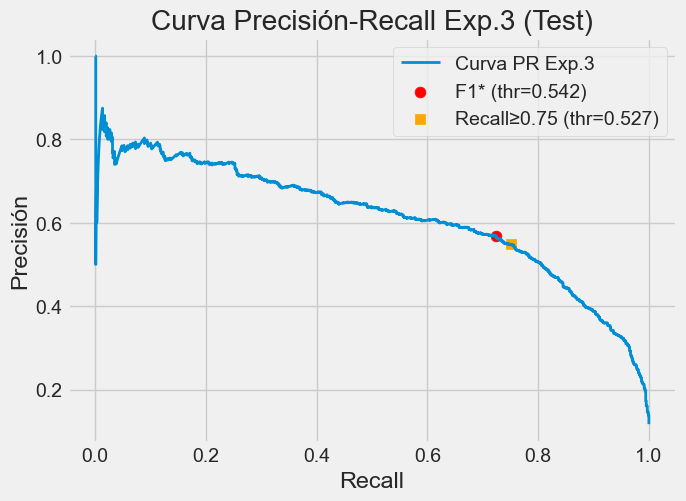

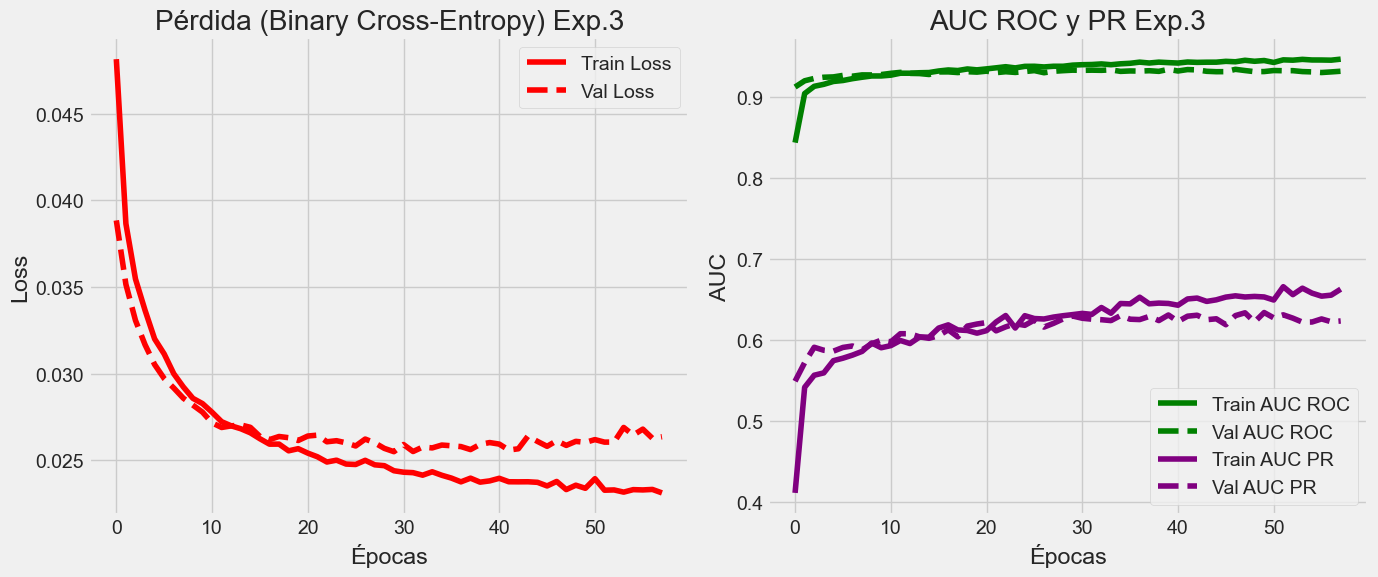

In [25]:
# === Evaluaci√≥n EXPERIMENTO 3 ===
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("------ Evaluaci√≥n General de Keras (Exp.3) ------")
loss, accuracy, auc_score, auc_pr_score = exp3_model.evaluate(X_test_processed, y_test, verbose=0)
print(f"P√©rdida en test: {loss:.4f}")
print(f"Accuracy en test: {accuracy:.4f}")
print(f"AUC ROC en test: {auc_score:.4f}")
print(f"AUC PR  en test: {auc_pr_score:.4f}")

# === 1. Probabilidades en TEST ===
y_test_proba = exp3_model.predict(X_test_processed, verbose=0).ravel()

# Reporte con umbral 0.5
y_pred_class = (y_test_proba >= 0.5).astype(int)
print("\n=== Reporte con umbral 0.5 (Exp.3) ===")
print(classification_report(y_test, y_pred_class, target_names=['No', 'S√≠']))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred_class))

# === 2. Curva PR y umbrales ===
prec, rec, thr = precision_recall_curve(y_test, y_test_proba)

# F1 en cada punto
f1_vals = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
best_idx = np.nanargmax(f1_vals)
best_thr = thr[best_idx]

# Umbral para Recall >= 0.75
idxs = np.where(rec[:-1] >= 0.75)[0]
thr_recall75 = thr[idxs[-1]] if len(idxs) else 0.5

print(f"\nUmbral F1*: {best_thr:.3f}  -> F1={f1_vals[best_idx]:.3f}, "
      f"P={prec[best_idx]:.3f}, R={rec[best_idx]:.3f}")
print(f"Umbral Recall‚â•0.75: {thr_recall75:.3f}")

# === 3. Evaluaci√≥n en distintos umbrales ===
def eval_at_threshold_exp3(th):
    y_pred = (y_test_proba >= th).astype(int)
    print(f"\n=== Evaluaci√≥n Exp.3 con umbral {th:.3f} ===")
    print(classification_report(y_test, y_pred, target_names=['No', 'S√≠']))
    print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))

eval_at_threshold_exp3(0.5)
eval_at_threshold_exp3(best_thr)
eval_at_threshold_exp3(thr_recall75)

# === 4. Gr√°fico PR ===
plt.figure(figsize=(7,5))
plt.plot(rec, prec, lw=2, label="Curva PR Exp.3")
plt.scatter(rec[best_idx], prec[best_idx], s=60, c='red',
            label=f"F1* (thr={best_thr:.3f})")
j = np.where(thr >= thr_recall75)[0]
j = j[0] if len(j) else best_idx
plt.scatter(rec[j], prec[j], s=60, c='orange', marker='s',
            label=f"Recall‚â•0.75 (thr={thr_recall75:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precisi√≥n")
plt.title("Curva Precisi√≥n-Recall Exp.3 (Test)")
plt.grid(True); plt.legend(); plt.show()

# === 5. Curvas de entrenamiento (loss y AUC) ===
hist3 = pd.DataFrame(exp3_history.history)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# P√©rdida
axes[0].plot(hist3['loss'], label='Train Loss', color='red')
axes[0].plot(hist3['val_loss'], label='Val Loss', color='red', linestyle='--')
axes[0].set_title('P√©rdida (Binary Cross-Entropy) Exp.3')
axes[0].set_xlabel('√âpocas'); axes[0].set_ylabel('Loss')
axes[0].legend(); axes[0].grid(True)

# AUC
axes[1].plot(hist3['auc'], label='Train AUC ROC', color='green')
axes[1].plot(hist3['val_auc'], label='Val AUC ROC', color='green', linestyle='--')
axes[1].plot(hist3['auc_pr'], label='Train AUC PR', color='purple')
axes[1].plot(hist3['val_auc_pr'], label='Val AUC PR', color='purple', linestyle='--')
axes[1].set_title('AUC ROC y PR Exp.3')
axes[1].set_xlabel('√âpocas'); axes[1].set_ylabel('AUC')
axes[1].legend(); axes[1].grid(True)

plt.tight_layout()
plt.show()